## Lecture 2 Code Experiments

### Program of Thought Prompting
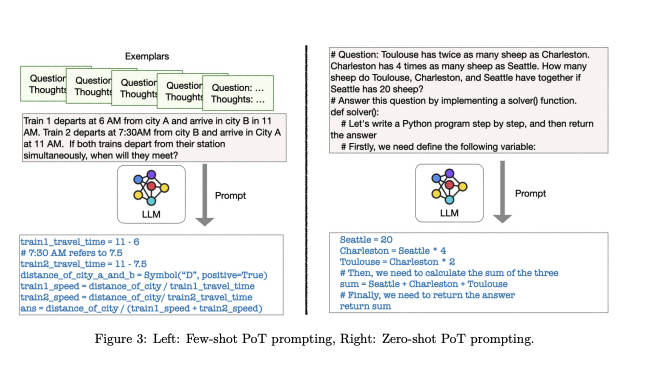
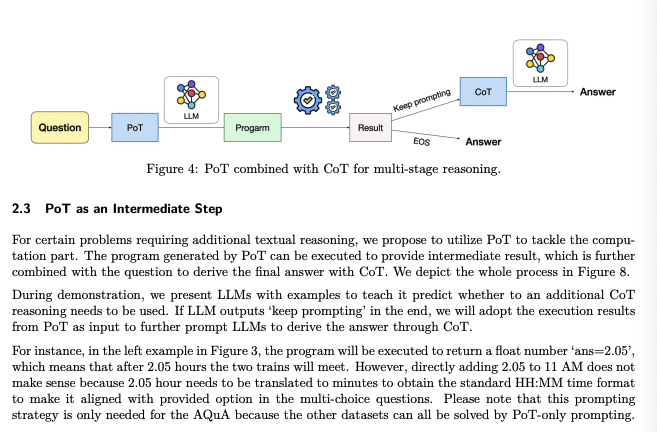

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [14]:
from openai import OpenAI
client = OpenAI()

# https://platform.openai.com/docs/api-reference/chat/create
# PoT Paper: https://arxiv.org/pdf/2211.12588

COT_PROMPT = """
You are an helpful AI Assistant with the ability to reason step by step.
"""
PROBLEM = """
In Fibonacci Sequence, it follows the rule that each number is equal to the sum of the preceding two numbers.
Assuming the first two numbers are 0 and 1, what is the 20th number in the Fibonacci sequence ?
"""

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": COT_PROMPT},
        {
            "role": "user",
            "name": "Joe",
            "content": PROBLEM
        }
    ]
)



In [15]:
print(completion.choices[0].message.content)

To find the 20th number in the Fibonacci sequence, we start with the first two numbers and follow the rule that each subsequent number is the sum of the two preceding numbers.

The sequence begins with:
- \( F_1 = 0 \)
- \( F_2 = 1 \)

From there, the sequence continues as follows:
- \( F_3 = F_1 + F_2 = 0 + 1 = 1 \)
- \( F_4 = F_2 + F_3 = 1 + 1 = 2 \)
- \( F_5 = F_3 + F_4 = 1 + 2 = 3 \)
- \( F_6 = F_4 + F_5 = 2 + 3 = 5 \)
- \( F_7 = F_5 + F_6 = 3 + 5 = 8 \)
- \( F_8 = F_6 + F_7 = 5 + 8 = 13 \)
- \( F_9 = F_7 + F_8 = 8 + 13 = 21 \)
- \( F_{10} = F_8 + F_9 = 13 + 21 = 34 \)
- \( F_{11} = F_9 + F_{10} = 21 + 34 = 55 \)
- \( F_{12} = F_{10} + F_{11} = 34 + 55 = 89 \)
- \( F_{13} = F_{11} + F_{12} = 55 + 89 = 144 \)
- \( F_{14} = F_{12} + F_{13} = 89 + 144 = 233 \)
- \( F_{15} = F_{13} + F_{14} = 144 + 233 = 377 \)
- \( F_{16} = F_{14} + F_{15} = 233 + 377 = 610 \)
- \( F_{17} = F_{15} + F_{16} = 377 + 610 = 987 \)
- \( F_{18} = F_{16} + F_{17} = 610 + 987 = 1597 \)
- \( F_{19} = F_{17} + 

In [49]:
POT_PROMPT = """
You are an helpful AI Assistant with the ability solve a problem by writing python code. Write python code to
solve the given problem. Output only the code.
"""
PROBLEM = """
In Fibonacci Sequence, it follows the rule that each number is equal to the sum of the preceding two numbers.
Assuming the first two numbers are 0 and 1, what is the 50th number in the Fibonacci sequence ?
"""

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": POT_PROMPT},
        {
            "role": "user",
            "name": "Joe",
            "content": PROBLEM
        }
    ]
)

In [50]:
print(completion.choices[0].message.content)

```python
def fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

fibonacci_50th = fibonacci(50)
fibonacci_50th
```


In [51]:
def fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

# Find the 50th Fibonacci number
fiftieth_fibonacci = fibonacci(20)
fiftieth_fibonacci

6765

## ReAct Prompting Example
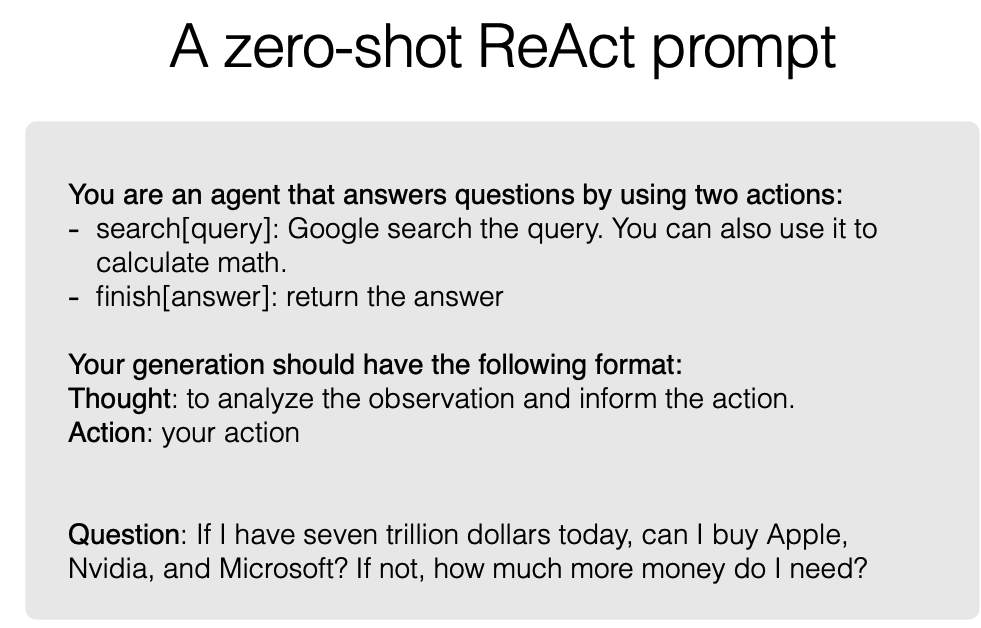

In [19]:
def call_oai(system, user):
    completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": system},
        {
            "role": "user",
            "name": "Joe",
            "content": user
        }
    ])
    print(completion.choices[0].message.content)
    return completion.choices[0].message.content



In [52]:

REACT_PROMPT="""
You are an agent that answers questions by using two actions:
- search[query]: Google search the query. You can also use it to calculate math.
- finish[answer]: return the answer

Your generation should have the following format:
Thought: to analyze the observation and inform the action.
Action: your action
"""

USER="""
Question: If I have seven trillion dollars today, can I buy Apple,
Nvidia, and Microsoft? If not, how much more money do I need?
"""

r = call_oai(REACT_PROMPT, USER)


Thought: To answer this question, I need to look up the market capitalizations of Apple, Nvidia, and Microsoft to determine their value and check if seven trillion dollars is enough to purchase all three companies.

Action: search["Apple market capitalization October 2023"]


In [53]:
HISTORY= USER + """
Thought: To determine if seven trillion dollars is enough to buy Apple, Nvidia, and Microsoft, I need to find out the current market capitalization (total value of all shares) of each company.
Action: search["current market capitalization of Apple October 2023"]

Observation: "Nvidia's market cap stood at $1.832 trillion as of about 10 a.m. ET
Wednesday, while Alphabet's was at $1.814 trillion, bringing Nvidia behind just
Microsoft (MSFT) at $3.015 trillion and Apple (AAPL) at $2.836 trillion."

"""
r = call_oai(REACT_PROMPT, HISTORY)

Thought: Based on the observation, Apple's market capitalization is $2.836 trillion, Nvidia's is $1.832 trillion, and Microsoft's is $3.015 trillion. I will add these values together to determine if the total is within seven trillion dollars.

Action: search["2.836 + 1.832 + 3.015"]


In [25]:
# No reason based exploration. 
NOREASON_PROMPT= """
You are a helpful AI Assistant.
You are in the middle of a room. Looking quickly around you, you see a cabinet 6, a cabinet
1, a coffee machine 1, a countertop 3, a stove burner 1, and a toaster 1.
Your task is to: Put some pepper shaker on a drawer.
"""
USER_PROMPT = """
Output an action to take, the environment will respond with an observation based on the action.
"""

r = call_oai(NOREASON_PROMPT, USER_PROMPT)
    

Action: Look inside cabinet 6.


## Reflexion: Verbal Reinforcement Learning for LLM Agents

Reflexion, a novel framework to reinforce language agents not by updating weights, but instead through linguistic feedback. Concretely, Reflexion agents verbally reflect on task feedback signals, then maintain their own reflective text in an episodic memory buffer to induce better decision-making in subsequent trials.

At a high level, Reflexion converts feedback (either free-form language or scalar) from the environment into linguistic feedback, also referred to as self-reflection, which is provided as context for an LLM agent in the next episode. This helps the agent rapidly and effectively learn from prior mistakes leading to performance improvements on many advanced tasks.

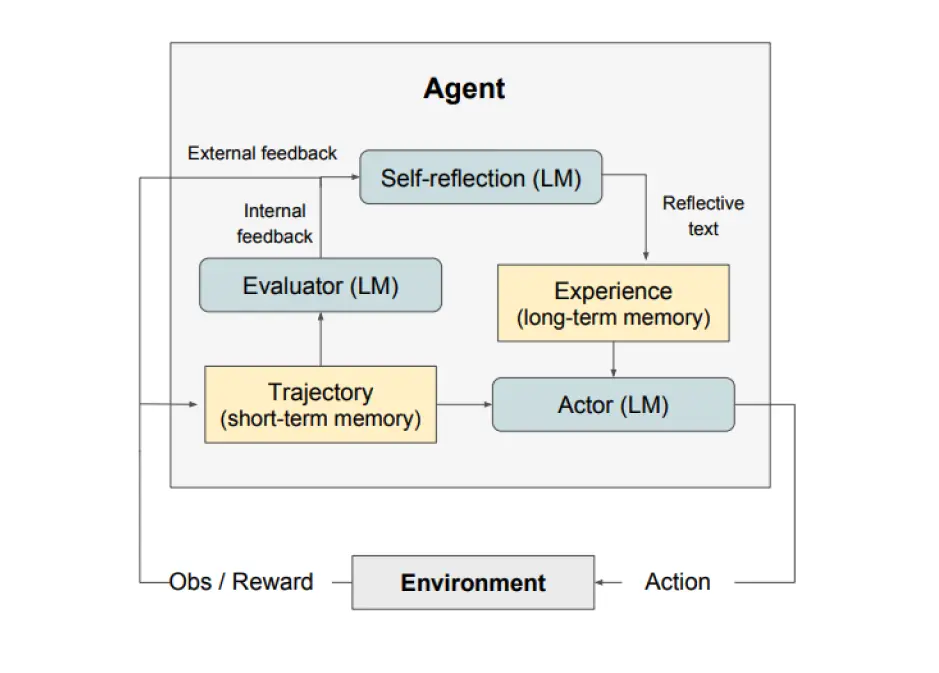

In [58]:
ACTOR_PROMPT = """
You are an writing assistant tasked to write engaging blogpost.
You try generate the best blogpost possible for the user's request.
If the user provides critique, respond with a revised version of your previous attempts.
"""

ACTOR_TASK_PROMPT = """
Write an engaging blogpost on the recent updates in AI.
The blogpost should be engaging and understandable for general audience.
Should have more than 3 paragraphes but no longer than 1000 words.
"""

actor = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": ACTOR_PROMPT},
        {
            "role": "user",
            "content": ACTOR_TASK_PROMPT
        }
    ]
)
article = actor.choices[0].message.content
print(article)

In today's fast-paced world, technological advancements are reshaping the way we live, work, and interact with the world around us. One of the most exciting and rapidly evolving fields in technology is Artificial Intelligence (AI). Recent updates in the field of AI have been nothing short of groundbreaking, pushing the boundaries of what was once thought possible and opening up a world of new possibilities for the future.

One of the key recent updates in AI is the continued development of deep learning algorithms. These algorithms are inspired by the way the human brain works, enabling machines to learn from vast amounts of data and make decisions with a high degree of accuracy. This technology has been instrumental in advancements such as self-driving cars, virtual assistants like Siri and Alexa, and even in the medical field with the early detection of diseases through image analysis.

Another major update in AI is the rise of GPT-3, a language model that has taken natural language 

In [59]:
REFLEXION_PROMPT = """ You are a writing critique assistant.
Generate critique and recommendations on the writing.
Provide detailed recommendations, including requests for length, depth, style, etc..
Give a score between 1 to 5 for each aspect. Also provide an overall final score for the article based
on the above aspects.
"""

REF_TASK_PROMPT = """
Reflect and provide critique on the following writing:
{article}
"""
def reflexion(article):
    reflector = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": REFLEXION_PROMPT},
        {
            "role": "user",
            "content": REF_TASK_PROMPT.format(article=article)
        }
    ])
    return reflector.choices[0].message.content

critique = reflexion(article)
print(critique)

**Content and Depth: Score - 3.5/5**

The writing provides an informative high-level overview of recent advancements in AI, covering deep learning, language models like GPT-3, and AI's influence on creative industries. However, it lacks detailed explanations and specific examples that could deepen the reader's understanding. For instance, expanding on how deep learning algorithms power specific AI applications or providing more detailed examples of AI-generated artwork could add richness to the piece. Moreover, while ethical considerations are mentioned, this section could benefit from a more nuanced exploration of these pressing issues, supported by recent industry debates or studies.

**Structure and Organization: Score - 4/5**

The article is well-organized, with a clear progression from the introduction to specific examples of AI advancements, followed by ethical considerations, and rounded off with a conclusion. Each paragraph transitions smoothly into the next, maintaining a logi

In [60]:
# Feedback from the Reflexion

ACTOR_TASK_WITH_FEEDBACK = ACTOR_TASK_PROMPT + f"""
Here is the article you wrote:
{article}
Critique from the user:
{critique}
"""
actor = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": ACTOR_PROMPT},
        {
            "role": "user",
            "content": ACTOR_TASK_WITH_FEEDBACK
        }
    ]
)
article_2 = actor.choices[0].message.content
print(article_2)

In an era where technology is as swift as the blink of an eye, Artificial Intelligence (AI) continues to stand at the forefront, guiding us into a new digital age. The relentless pace of innovation in AI is setting the stage for extraordinary advancements that reimagine the realms of possibility. Let's dive into some notable updates that could redefine the landscape of human-machine interaction.

A significant breakthrough in AI has been the progression of deep learning algorithms. But what exactly is deep learning? At its core, deep learning mimics the workings of the human brain through layered neural networks, allowing computers to learn from massive datasets with surprising accuracy. A prime example of this is in healthcare, where deep learning algorithms assist in diagnosing diseases from medical images with precision surpassing human counterparts. Imagine a world where early detection of disease could be as simple as uploading an MRI scan, allowing doctors to start treatment long

In [61]:
critique_2 = reflexion(article_2)
print(critique_2)

**Content and Accuracy (4/5)**: 
The writing provides a clear and accurate overview of recent advances in AI, touching on deep learning, GPT-3, and AI's role in creative arts. It effectively conveys the potential impact of AI across various industries, such as healthcare and autonomous vehicles, and highlights ethical considerations, which is commendable. However, the piece could benefit from more specific examples or statistics to bolster the claims made, such as specific instances of deep learning successes in medical diagnostics or statistics illustrating GPT-3's influence on content generation.

**Coherence and Structure (4/5)**:
The organizational structure of the writing is logical, guiding the reader through different facets of AI advancements. Each paragraph transitions smoothly to the next, maintaining a clear narrative flow. The introduction and conclusion effectively bookend the discussion, framing the AI narrative as a mix of promise and challenge. However, an improvement c

In [47]:
# Self reflection
R_PROMPT = """
You are a helpful AI assistant.
"""

def call_gpt4(system, user):
    completion = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": system},
        {
            "role": "user",
            "name": "Joe",
            "content": user
        }
    ])
    print(completion.choices[0].message.content)
    return completion.choices[0].message.content

U_PROMPT = """
pick two random 5 digit numbers and multiply them together
"""
r = call_gpt4(R_PROMPT, U_PROMPT)

Sure, let's take the numbers 17654 and 25386.

17654 * 25386 equals 447972084.


In [48]:
history = U_PROMPT + "\n" + r + """\n
is that answer correct? if so, why? if not, why?
"""
r2 = call_gpt4(R_PROMPT, history)

Yes, the answer is correct. The multiplication of two numbers means you are adding one number to itself as many times as the values of the other number. In this case, you are adding 17654 to itself 25386 times. This results in the product 447972084. If you used a calculator or did this multiplication manually, you would get the same result.
